In [5]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

dir_path = 'C:/Users/francis/Machine_Learning/francis/Documents/GitHub/4th-ML100Days/data/'

In [9]:
f_app_train = os.path.join(dir_path + 'application_train.csv')
app_train = pd.read_csv(f_app_train)
print('Path of data is : %s'%(f_app_train))
print(app_train.shape)
app_train.head()

Path of data is : C:/Users/francis/Machine_Learning/francis/Documents/GitHub/4th-ML100Days/data/application_train.csv
(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# 資料整理 ( 'DAYS_BIRTH'全部取絕對值 )
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [28]:
import warnings
warnings.filterwarnings('ignore')
# 根據年齡分成不同組別 (年齡區間 - 還款與否)
age_group = app_train[['TARGET','DAYS_BIRTH']]
age_group['YEARS_BIRTH'] = age_group['DAYS_BIRTH'] / 365
print(age_group['YEARS_BIRTH'].describe())
# 連續資料離散化
age_group['YEARS_BINNED'] = pd.cut(age_group['YEARS_BIRTH'],
                                   bins = np.linspace(20,70,num = 11))
age_group

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: YEARS_BIRTH, dtype: float64


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
...,...,...,...,...
307506,0,9327,25.553425,"(25.0, 30.0]"
307507,0,20775,56.917808,"(55.0, 60.0]"
307508,0,14966,41.002740,"(40.0, 45.0]"
307509,1,11961,32.769863,"(30.0, 35.0]"


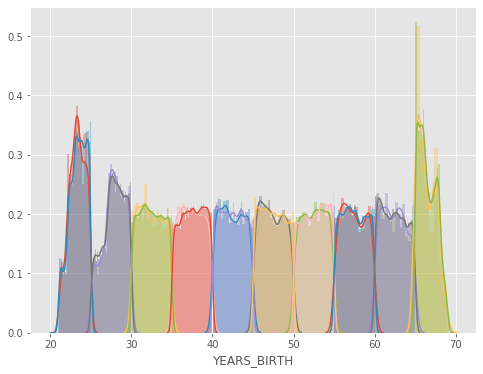

In [40]:
# 資料分群後排序
age_group['YEARS_BINNED'].value_counts()
age_group_sort = np.sort(age_group['YEARS_BINNED'].unique())

# 繪製分群後的 10 條 KDE 曲線
plt.figure(figsize = (8,6))


for i in range(len(age_group_sort)):
    sns.distplot(age_group.loc[(age_group['TARGET'] == 1) \
                               &(age_group['YEARS_BINNED'] ==  age_group_sort[i]),'YEARS_BIRTH'], label = str(age_group_sort[i]))
    sns.distplot(age_group.loc[(age_group['TARGET'] == 0 ) \
                              &(age_group['YEARS_BINNED'] == age_group_sort[i]),'YEARS_BIRTH'], label = str(age_group_sort[i]))
 


plt.show()

## plt.subplot

<function matplotlib.pyplot.show(*args, **kw)>

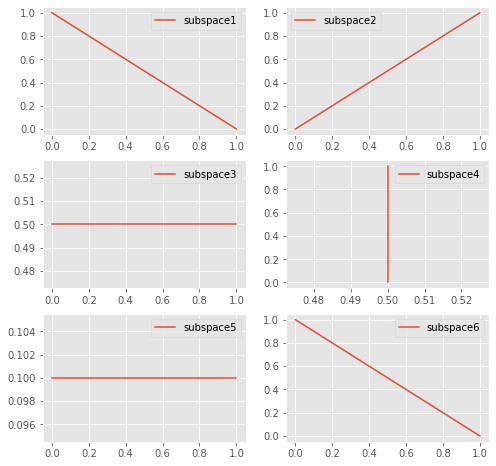

In [65]:
plt.figure(figsize =(8,8))

plt.subplot(321)
plt.plot([0,1],[1,0],label = 'subspace1')
plt.legend()

plt.subplot(322)
plt.plot([0,1],[0,1],label = 'subspace2')
plt.legend()

plt.subplot(323)
plt.plot([0,1],[0.5,0.5], label = 'subspace3')
plt.legend()

plt.subplot(324)
plt.plot([0.5,0.5],[0,1],label = 'subspace4')
plt.legend()


plt.subplot(325)
plt.plot([0,1],[0.1,0.1],label = 'subspace5')
plt.legend()


plt.subplot(326)
plt.plot([0,1],[1,0],label = 'subspace6')
plt.legend()

plt.show

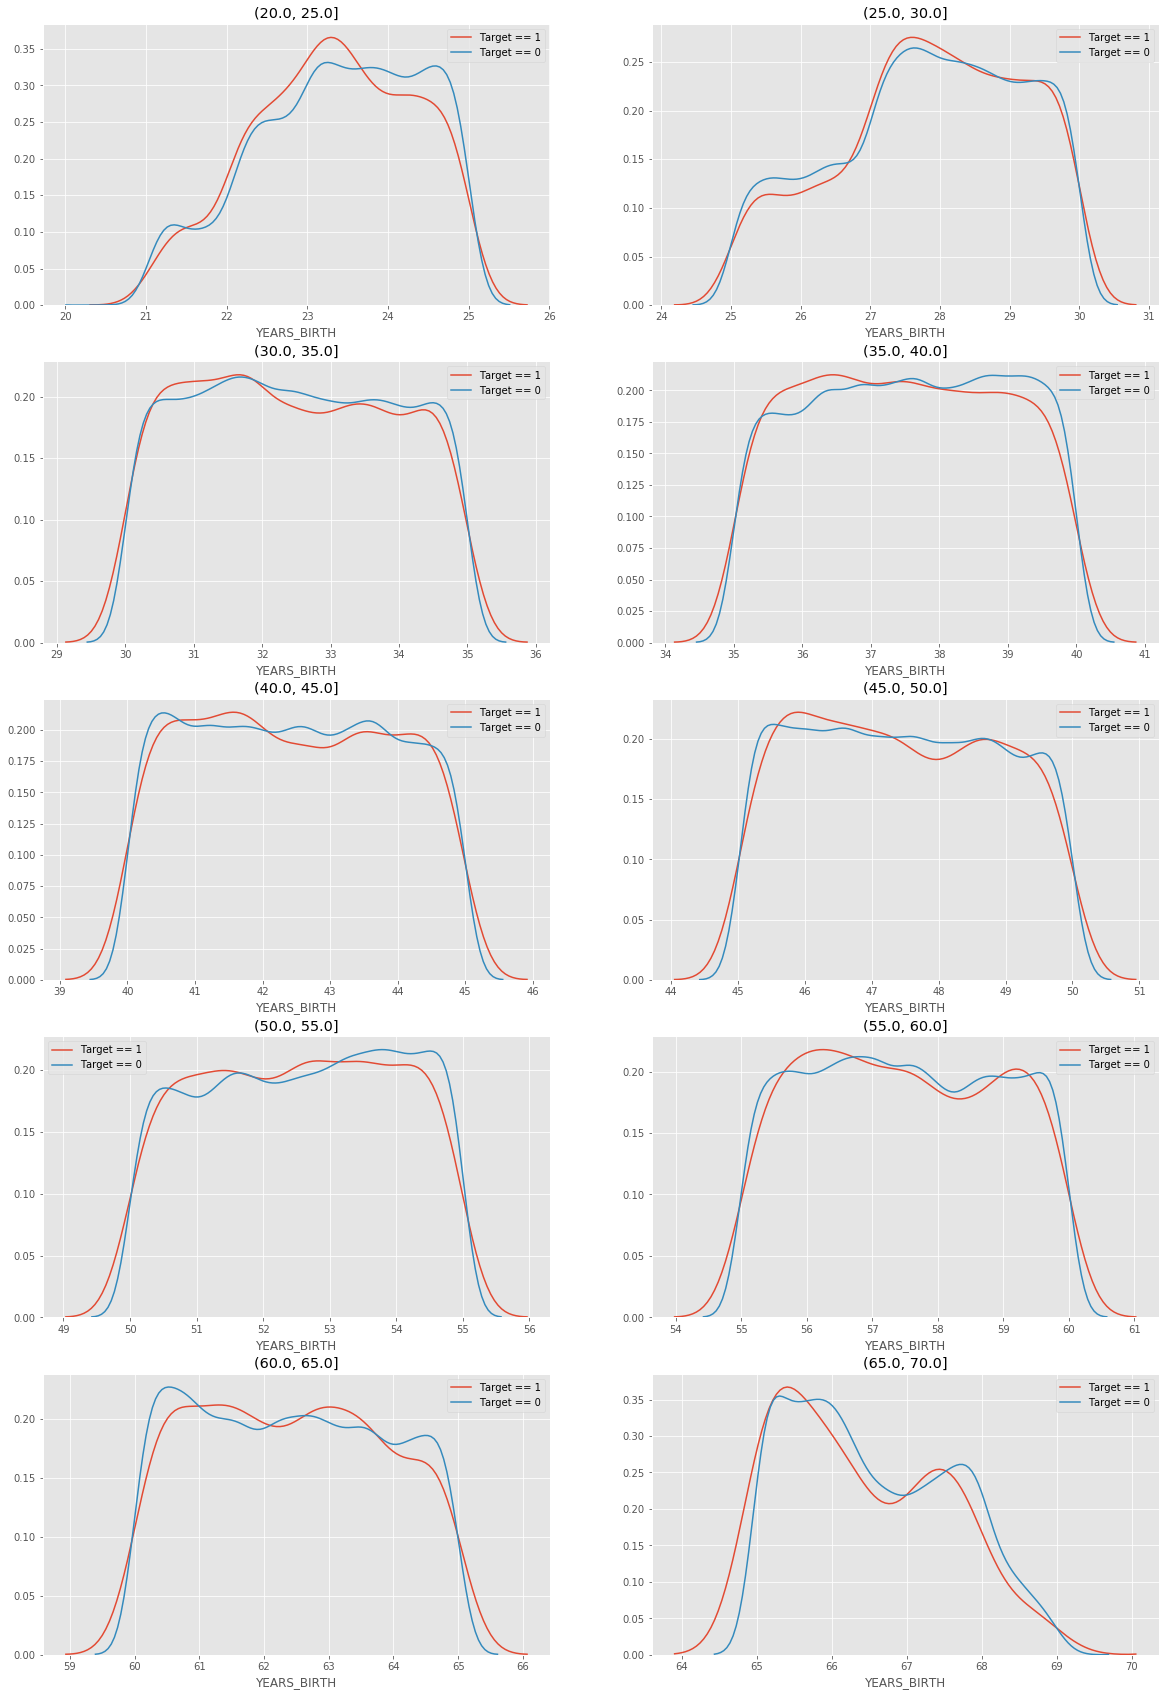

In [81]:
# subplot index 超過10以上的繪製方式
plt.figure(figsize = (20,30))

ncol = 2
nrow = 5

for i in range(len(age_group_sort)):
    plt.subplot(nrow,ncol,i+1)
    sns.distplot(age_group.loc[(age_group['TARGET'] == 1) & (age_group['YEARS_BINNED'] == age_group_sort[i]), \
                                                            'YEARS_BIRTH'] , label = 'Target == 1', hist = False)
    sns.distplot(age_group.loc[(age_group['TARGET'] == 0) & (age_group['YEARS_BINNED'] ==  age_group_sort[i]), \
                             'YEARS_BIRTH'], label = 'Target == 0', hist = False)
    plt.title(str(age_group_sort[i]))
    
plt.show()
    


## 作業
### 請使用 application_train.csv, 根據不同的 HOUSETYPE_MODE 對 AMT_CREDIT 繪製 Histogram

In [89]:
print(app_train['HOUSETYPE_MODE'].unique())
print(app_train['AMT_CREDIT'].describe())


['block of flats' nan 'terraced house' 'specific housing']
count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


block of flats      150503
specific housing      1499
terraced house        1212
Name: HOUSETYPE_MODE, dtype: int64


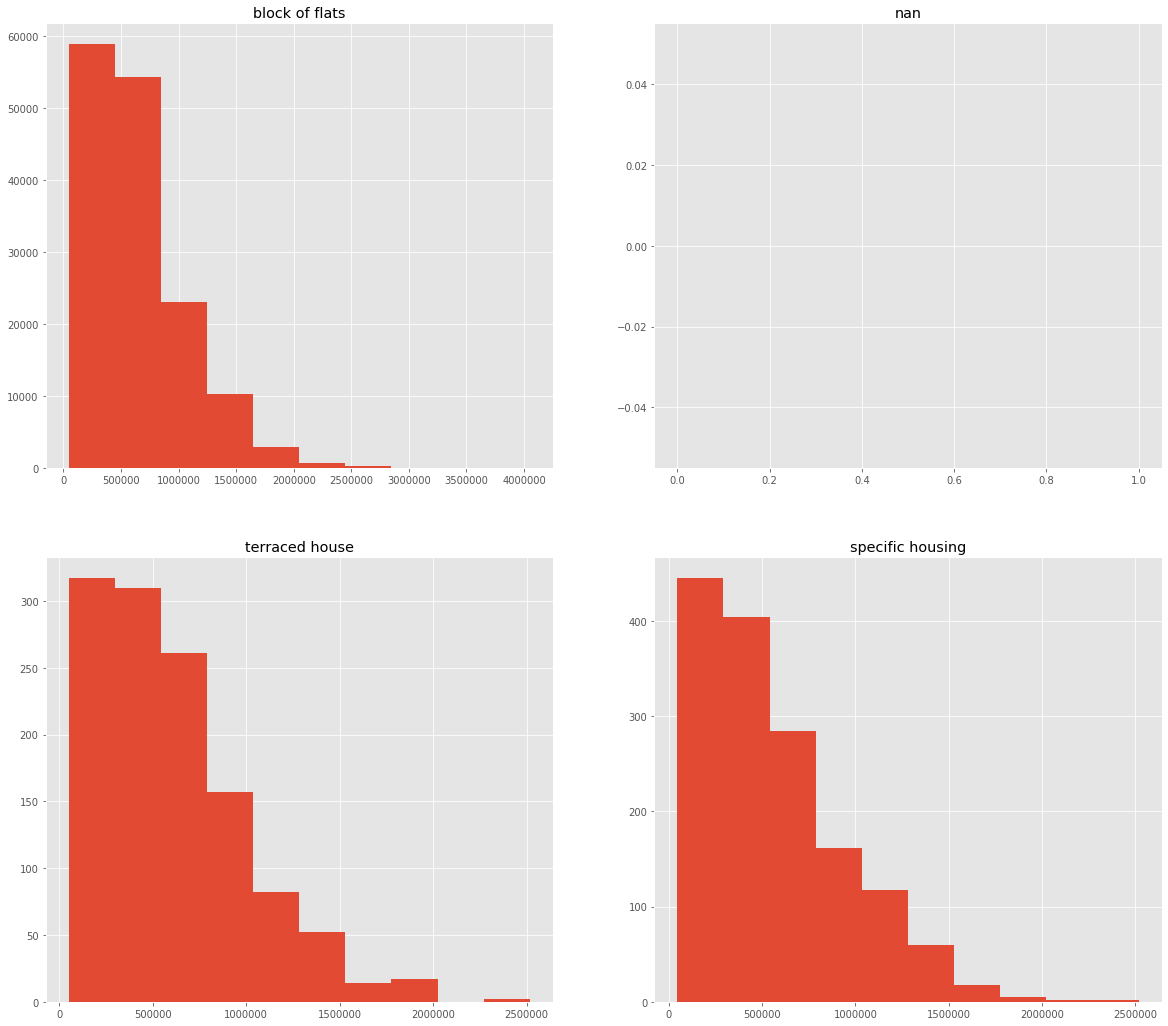

In [98]:
plt.figure(figsize = (20,18))
house_type = app_train['HOUSETYPE_MODE'].unique()
house_group = app_train[['HOUSETYPE_MODE','AMT_CREDIT']]
print(house_group['HOUSETYPE_MODE'].value_counts())

nrow = 2
ncol = 2

for i in range(len(house_type)):
    plt.subplot(nrow,ncol, i+1)
    plt.hist(house_group.loc[(house_group['HOUSETYPE_MODE'] ==  house_type[i]),\
            'AMT_CREDIT'], label = str(house_type[i]))
    plt.title(str(house_type[i]))
    
plt.show()